In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/international-airline-passengers.csv")
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Month                                                                           145 non-null    object 
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
# df.columns = [['Month', 'MTIT']] #monthly total in thousands

In [ ]:
df.columns

Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [ ]:
df = df[["International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60"]]

In [ ]:
df.isna().sum()

International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    1
dtype: int64

In [ ]:
df = df.dropna()
 
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


In [ ]:
train_len = int(0.8 * len(df))
train_len

115

In [ ]:
train = df[:train_len]
train.shape

(115, 1)

In [ ]:
test = df[train_len:]
test.shape

(29, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler 
 
sc = StandardScaler() 
 
sc_train = sc.fit_transform(train)
sc_test = sc.fit_transform(test)

In [ ]:
def feature_transform(n_steps, data):
  x = [] 
  y = [] 
  for i in range(n_steps, len(data)):
    x.append(data[i-n_steps:i, 0])
    y.append(data[i, 0])
  return np.array(x), np.array(y)

In [ ]:
n_steps = 3

In [ ]:
x_train, y_train = feature_transform(n_steps, sc_train)

In [ ]:
x_train.shape, y_train.shape

((112, 3), (112,))

In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

In [ ]:
from keras.models import Sequential 
from keras.layers import LSTM, Dense 
 
model = Sequential() 
 
model.add(LSTM(200, activation = 'relu', input_shape = (n_steps, 1))) 
 
model.add(Dense(1)) 
 
model.compile(loss = 'mean_squared_error' , optimizer = 'adam') 
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 30)

Epoch 1/100
4/4 [==============================] - 1s 13ms/step - loss: 0.9188
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 0.8496
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6438
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6640
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5600
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.4334
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.3325
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2184
Epoch 9/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2647
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2088
Epoch 11/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1924
Epoch 12/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2073
Epoch 13/100
4/4 [==============================] - 0s 10

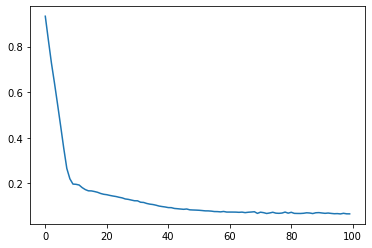

In [ ]:
plt.plot(history.history["loss"]) 
plt.show()

In [ ]:
x_test, y_test = feature_transform(n_steps, sc_test)

In [ ]:
x_test.shape, y_test.shape

((26, 3), (26,))

In [ ]:
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
predictions = sc.inverse_transform(y_pred)

In [ ]:
predictions

array([[370.2265 ],
       [319.95428],
       [350.68326],
       [367.67618],
       [339.23914],
       [417.21597],
       [388.0328 ],
       [424.13974],
       [472.48337],
       [548.97943],
       [556.11017],
       [419.39453],
       [408.2905 ],
       [373.5608 ],
       [411.90475],
       [415.50583],
       [393.29773],
       [425.87482],
       [461.1233 ],
       [472.07278],
       [545.22705],
       [627.41095],
       [579.0206 ],
       [427.6943 ],
       [468.27197],
       [389.93423]], dtype=float32)

In [ ]:
actual = sc.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
actual

array([[310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.],
       [432.]])

In [ ]:
from sklearn.metrics import mean_squared_error 
 
mse = mean_squared_error(actual, predictions) 
 
rmse = np.sqrt(mse) 
 
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", rmse)

Mean Squared Error :  2216.9919656384736
Root Mean Squared Error :  47.08494415031703
